In [26]:
import torch

class BlackBox:
    real_dim = 3
    input_dim = 100
    output_dim = 100

    def __init__(self):
        self.noise = torch.nn.Linear(self.real_dim, self.input_dim, bias=False)


        # Generate 3 random vectors of dimension 10
        v1 = torch.randn(100)
        v2 = torch.randn(100)
        v3 = torch.randn(100)

        # Perform Gram-Schmidt process to generate an orthonormal basis from the given vectors
        def gram_schmidt(*vectors):
            basis = []
            for v in vectors:
                w = v.clone()
                for u in basis:
                    w -= (torch.dot(v, u) / torch.dot(u, u)) * u
                w /= torch.norm(w)
                basis.append(w)
            return torch.stack(basis)

        # Generate the orthonormal basis
        self.orthonormal_basis = gram_schmidt(v1, v2, v3)


    def get_pair(self):
        with torch.no_grad():
            v_real = torch.randn(self.real_dim)
            v_in = self.noise( v_real )
            v_out = v_real @ self.orthonormal_basis
            return v_in, v_out

In [27]:
b = BlackBox()

b.get_pair()

(tensor([-0.1432,  0.6012, -0.5016, -0.0737,  0.1374, -0.4059,  0.1947, -0.3571,
         -0.5791,  0.6426,  0.0964, -0.2090, -0.3306,  0.1460,  0.2322,  0.4237,
         -0.5178,  0.2106,  0.4727, -0.8690, -0.6540, -0.5022,  0.1768,  0.0323,
          0.0051,  0.0648,  0.5672, -0.1257,  0.4966,  0.5296, -0.3294, -0.2460,
         -0.9218,  0.6259, -0.8335, -0.0197,  0.0337,  0.5948, -0.7069,  0.3076,
          0.6322,  0.0167, -0.0821, -0.8469, -0.7171,  0.6053, -0.6611, -0.2750,
         -0.3172, -0.3699, -0.7652,  0.0957,  0.0041,  0.0693, -0.4160, -0.4578,
          0.5033,  0.1520, -0.2416,  0.7878,  0.0323, -0.1058,  0.3169,  0.1282,
          0.0358,  0.0585, -0.0341, -0.0582, -0.5266,  0.3938, -0.1752,  0.5759,
         -0.7004, -0.7719, -0.4021, -0.8720, -0.2279,  0.3906, -0.7049,  0.4102,
         -0.3609, -0.6582,  0.3924, -0.1803,  0.7787, -0.3586, -0.1077, -0.1847,
          0.1705,  0.1187,  0.0586, -0.8433,  0.1140, -0.6578, -0.4264,  0.5176,
         -0.2210, -0.3852,  

[3.16878468e-01 2.96540171e-01 2.64179587e-01 1.57093627e-08
 1.41390410e-08 1.10785363e-08 4.69383421e-09 4.20333945e-09
 3.68863273e-09 3.62156416e-09 3.60609631e-09 3.29661942e-09
 3.18297944e-09 3.10156856e-09 2.93002023e-09 2.86475332e-09
 2.78013923e-09 2.75514234e-09 2.74206724e-09 2.70918399e-09
 2.56366239e-09 2.49993715e-09 2.37642106e-09 2.32005881e-09
 2.21584906e-09 2.19049734e-09 2.12533946e-09 2.11692974e-09
 2.09103490e-09 2.05028949e-09 2.00074868e-09 1.95508432e-09
 1.91521132e-09 1.87576998e-09 1.78326676e-09 1.72525128e-09
 1.69424086e-09 1.61602143e-09 1.56666957e-09 1.52690038e-09
 1.49814239e-09 1.46836521e-09 1.43944734e-09 1.42099565e-09
 1.39037892e-09 1.32226330e-09 1.30779254e-09 1.28111410e-09
 1.24386579e-09 1.21236277e-09 1.16524368e-09 1.12349929e-09
 1.09261777e-09 1.08136522e-09 1.03297837e-09 9.93219951e-10
 9.85487358e-10 9.61807856e-10 9.02756814e-10 8.89115725e-10
 8.69882000e-10 8.42683645e-10 7.99362798e-10 7.74519338e-10
 7.56573637e-10 7.314265

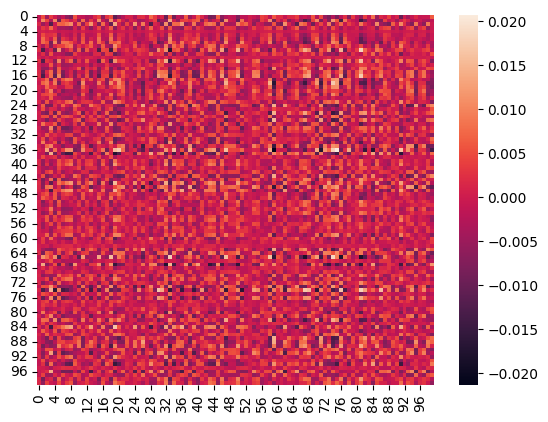

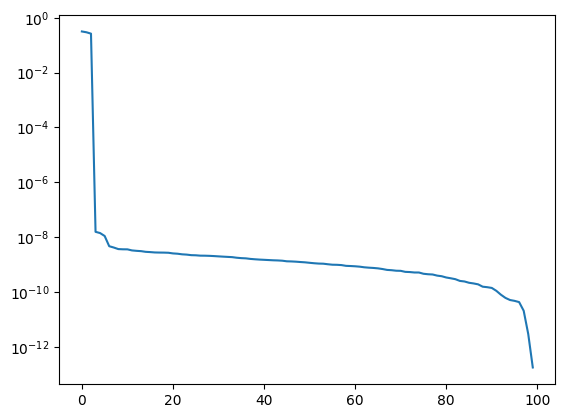

In [28]:
inputs = []
outputs = []

for i in range(100):
    v_in, v_out = b.get_pair()
    inputs.append(v_in)
    outputs.append(v_out)

from sklearn import linear_model

l = linear_model.LinearRegression().fit(inputs, outputs)


import numpy as np
U, S, V = np.linalg.svd(l.coef_)

x -> W -> y

x -> W            -> y # n^2 parameters
  -> U -> S -> V  ->   # 2n parameters
print(S)

dim_100 ->  dim_3   -> dim_100

x = dim_100 -> z = dim_1000 -> dim_100 = y

torch.randn(100)

-> torch [ 1000 ] [ 0, 0, 0, 0.01, 0, 0, 1.4, 0, 0, ]

"Sparse Auto Encoders"

loss = (x - y)**2 + abs(z)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(l.coef_)

plt.figure()
plt.semilogy(S)

In [44]:

from taker import Model
m = Model()

m_layers =  [0, 1, 2, 3, 4, 5]


# residual_0 = input_layer -> attn_0 -> vector
# residual_1 = residual_0 + attn(residual_0)
# residual_2 = residual_1 + mlp(residual_1)
# residual_3 = residual_2 + attn(residual_2)
# residual_4 = residual_3 + mlp(residual_3)
# residual_5 = residual_4 + attn(residual_4)
# ...
# residual_n = residual_n-1 +
r = m.get_residual_stream("I am a dog that goes woof")
print(r.shape)

init_layer = 4
next_layer = 5
token_pos = 3
residual_different_vector = r[5, token_pos] - r[4, token_pos]

print(residual_different_vector.shape)

logits = m.unembed(residual_different_vector)
best_token = logits.argmax()


m.tokenizer.decode(best_token)

- Loaded nickypro/tinyllama-15m
 - Registered 6 Attention Layers
torch.Size([13, 9, 288])
torch.Size([288])


'today'